# Project 2: Investigate the dataset TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To create this analysis I choose the dataset called 'TMDb movie data'. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The questions that I will answer on this report are the next ones:

- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First of all I will load the libraries that I will use in this analysis.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Next I will load the dataset from the CSV file called 'tmdb-movies.csv'.

In [2]:
# Read the data
df = pd.read_csv('tmdb-movies.csv')

#Show the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Shape of the dataset
df.shape

(10866, 21)

As we can see from the previous preview, this dataset contains in total 21 columns and 10866 rows.

Now I will check the number of NA and datatype of each feature.

In [4]:
#Check the number of NA and data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In this case we can see that some columns like 'homepage' and 'cast' they have missing values. So this means that I will have to impute this missing values or drop this rows.

### Data Cleaning

First of all I will remove the columns that they are not useful for the analysis.

In [5]:
#Get the list of the names of the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

If I check the preview that I did before I can see that there are some columns that they are not usefull for this analysis, like for example 'id', 'idmb_id' and 'homepage'. So I will drop this columns before doing the analysis.

In [6]:
#Drop the useless columns
df.drop(['id','imdb_id','homepage','overview'], axis = 1, inplace = True)

#Check again the name of the columns
df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Now we also can see the column 'keywords', in the first preview this column was hiden because the number of columns was too big.

Another thing we can see from this dataset is that there are some columns that they contain multiple values splited by a vertical bar '|'. This means that later I will have to split this columns into multiple rows to do the analysis.

Once I have removed the columns I will not use let's check again the number of NA for each column.

In [7]:
#Check the number of NA and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 1.4+ MB


As I can see there are 3 columns that they have more than 1000 missing values, this are 'tagline', 'keywords' and 'production_companies'. Even that this columns can be really interestin to do some analysis, in this analysis they will not be needed to answer the questions that I want to answer. So insted of losing data from other columns, I will remove this 3 columns.

In [8]:
#Drop the 3 columns with more NA
df.drop(['tagline', 'keywords', 'production_companies'], axis = 1, inplace = True)

#Check the header again
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Finally I will remove the rows that they have NA so I will make sure that all the rows contains values for each column.

In [9]:
#Check the number of columns before drop all NA
df.shape

(10866, 14)

In [10]:
#Drop all the rows with NA
df.dropna(inplace = True)

#Check again the number of columns after the drop
df.shape

(10732, 14)

As we can see after the cleaning we have lost 134 rows and 7 columns.

Finally I will check if there are some duplicated rows, so then I will remove this that are duplicated.

In [11]:
#Check if there are duplicated rows
sum(df.duplicated())

1

As we can see there is 1 duplicated row so I will remove this one before doing the EDA.

In [12]:
#Drop duplicated rows
df.drop_duplicates(inplace = True)

Before going to the EDA let's do a final check for all the columns.

In [13]:
#Check the number of NA and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

To answer this question I will use the column 'popularity', 'release_year' and 'genres'. The tricky thing in this case is that the genres column contains multiple values splited by a vertical bar. This means I will have to split this column into multiples rows.

In [14]:
#Select the columns I will use
popular_year = df[['popularity','release_year','genres']]

#Show the head of the table
popular_year.head(3)

,popularity,release_year,genres
0,32.985763,2015,Action|Adventure|Science Fiction|Thriller
1,28.419936,2015,Action|Adventure|Science Fiction|Thriller
2,13.112507,2015,Adventure|Science Fiction|Thriller


Before continuo I also would like to explore the variable 'release_year' to know how many years and films there are per year.

In [15]:
#Count the number of films for each year
count_year = popular_year[['popularity', 'release_year']].groupby(['release_year'], as_index = False).count()

#Rename column 'popularity' to 'n'
count_year.rename(columns={'popularity': 'n'}, inplace = True)

#Show the header
count_year.head()

,release_year,n
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42


Once I have a table with the number of fils for each year I will do a plot visualitzation to see better how many films there are for each year.

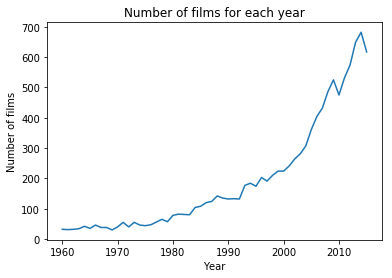

In [16]:
#Create plot with the number of fils for each year
plt.plot(count_year.release_year, count_year.n)
plt.xlabel("Year")
plt.ylabel("Number of films")
plt.title("Number of films for each year")
plt.show()

As I can see from the previous plot, the number of films has increased exponentially during the last years.

Another nice thing to see it would be to see the film with the maximum popularity each year, just to see if there is some years that the popularity went really bad or even if there is a trend in the fils in where every x years there is a film with a really high popularity. To do this I will do it kind of similar than before.

In [17]:
#Select for each year the maximum popularity
max_popularity_year = df[['popularity', 'release_year']].groupby(['release_year'], as_index = False).max()

#Show the head
max_popularity_year.head()

,release_year,popularity
0,1960,2.610362
1,1961,2.631987
2,1962,3.170651
3,1963,2.508235
4,1964,3.153791


In [18]:
#Show the tail
max_popularity_year.tail()

,release_year,popularity
51,2011,8.411577
52,2012,7.637767
53,2013,6.112766
54,2014,24.949134
55,2015,32.985763


Now let's plot this data in a lineplot to see better what is the max popularity for each year.

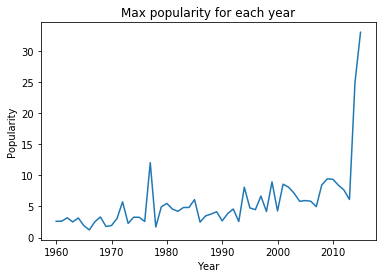

In [19]:
#Create plot with the max popularity for each year
plt.plot(max_popularity_year.release_year, max_popularity_year.popularity)
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title("Max popularity for each year")
plt.show()

As I can see from the previous plot, the popularity of the movies has increased really a lot specially the last 2 years in where the max popularity it is above 24, meanwhile the popularity in the previous years was lower than 15.

So I know the popularity and the amount of films per year let's go to answer the main question. To do that, first I need to split the column 'genres' into multiple rows (one row for each genre in each row).

To do that I used the recommendation of this [link](https://stackoverflow.com/questions/39504079/take-column-of-string-data-in-pandas-dataframe-and-split-into-separate-columns).

In [20]:
#Split the column 'genres' into multiple columns
popular_year_split = popular_year.set_index(['popularity','release_year']).genres.str.split('|', expand=True).reset_index()

#Show the header
popular_year_split.head()

,popularity,release_year,0,1,2,3,4
0,32.985763,2015,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,2015,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,2015,Adventure,Science Fiction,Thriller,None,None
3,11.173104,2015,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,2015,Action,Crime,Thriller,None,None


As I can see there is maximum 5 different type of genres for each film. Now I will melt all the dataframe and create a row for each genre and film. I know melt because I know quite well R and I use it with the library reshape2 to melt a dplyr dataframe.

In [21]:
#Melt the dataframe
popular_year_split_melt = pd.melt(popular_year_split, id_vars = ['popularity','release_year'])

#Show the header
popular_year_split_melt.head()

,popularity,release_year,variable,value
0,32.985763,2015,0,Action
1,28.419936,2015,0,Action
2,13.112507,2015,0,Adventure
3,11.173104,2015,0,Action
4,9.335014,2015,0,Action


Now I will drop the column 'variable' because it's not useful for our analysis.

In [22]:
#Drop column 'variable'
popular_year_split_melt.drop(['variable'], axis = 1, inplace = True)

#Show the header
popular_year_split_melt.head()

,popularity,release_year,value
0,32.985763,2015,Action
1,28.419936,2015,Action
2,13.112507,2015,Adventure
3,11.173104,2015,Action
4,9.335014,2015,Action


Finally I will aggregate per year and genre by summing the popularity and finally I will take the max of each year.

In [23]:
#Agregate by year and genre and sum the popularity
genre_year = popular_year_split_melt.groupby(['release_year','value']).sum().reset_index()

#Show head
genre_year.head()

,release_year,value,popularity
0,1960,Action,4.725796
1,1960,Adventure,3.504904
2,1960,Comedy,3.168003
3,1960,Crime,0.692959
4,1960,Drama,7.361967


Now that I have the table with the total sum of popularity for each year and genre I will choose the genre with the highest popularity for each year. To do that, I found some help in this [link](https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns).

In [24]:
#Select the highest popularity of each year
list_highest_popularity_year = genre_year.groupby(['release_year']).agg({'popularity' : 'max'}).reset_index()

#Join the list of the highest popularity of each year with the list of 'genre_year' to get the name of the genre of each year
list_highest_popularity_year = pd.merge(genre_year, list_highest_popularity_year, how = 'inner', 
                                        left_on = ['release_year','popularity'], right_on = ['release_year','popularity'])

#Show the head
list_highest_popularity_year.head()

,release_year,value,popularity
0,1960,Drama,7.361967
1,1961,Drama,6.915731
2,1962,Drama,8.232008
3,1963,Thriller,7.199292
4,1964,Comedy,7.859657


Finally I got the table in where I can see for each year which genre was more popular for that year.

Now I will pivot this table and create a column for each different genre and then plot in a bar plot for each year. To this I found some help in this [link](https://stackoverflow.com/questions/48958035/pandas-convert-some-rows-to-columns-in-python) in where it is explained how to do a pivot and also in this [link](https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html) in where I can do a stacked bar plot.

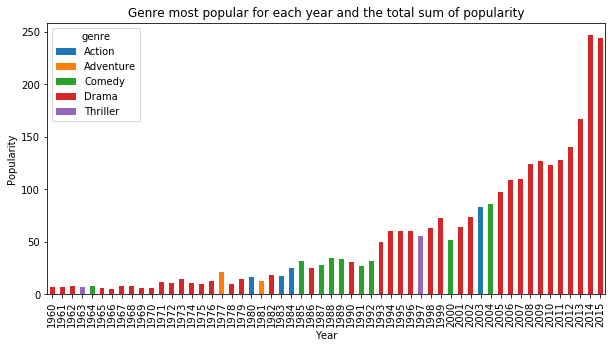

In [25]:
#Stacket bar plot in where I can see the genre most popular for each year and the popularity of each genre for each year
list_highest_popularity_year.rename(columns = {'value': 'genre'})\
.pivot(index='release_year', columns='genre', values='popularity').reset_index()\
.plot(kind='bar',x='release_year', stacked=True, figsize=(10,5));
plt.xlabel("Year");
plt.ylabel("Popularity");
plt.title("Genre most popular for each year and the total sum of popularity");
plt.show();

In the previous plot we can see clearly that the genre that is more popular almost all the years is the 'Drama'.

If we want to see this more clear, I will aggragate the data and count the total for each genre.

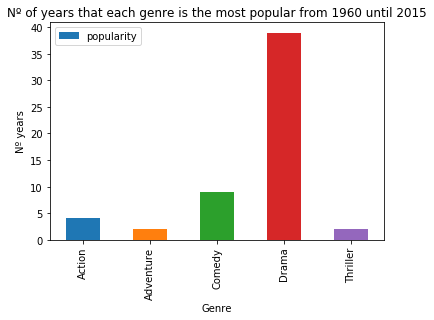

In [26]:
list_highest_popularity_year[['value','popularity']].groupby(['value']).count().reset_index()\
.plot(kind='bar',x='value',y='popularity');
plt.xlabel("Genre");
plt.ylabel("Nº years");
plt.title("Nº of years that each genre is the most popular from 1960 until 2015");
plt.show();

As I can see, the winner is the genre 'Drama' with 39 times and the next one is 'Comedy' with 9.

### What kinds of properties are associated with movies that have high revenues?

To asnwer this question it gets more tricky so first let's see the columns and see which of them can be interesting to answer this question.

In [27]:
#Show the header
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


The first thing to take into account is that to answer this questions we can do it using numerical variables and categorical variables. For example, can be that some actors or directors they maybe have a high probavility to have a high revenue. Also can affect the genres and other factors.

As we can see, there are two columns with the budget and the revenue. This is because during the last years the inflation makes the things more expensive so the columns that they end with `_adj` means that they are adjusted with the inflation. So to check the revenue I will use the adjusted columns.

In this case, I will focus only with the numerical columns. This are the 'popularity', 'runtime', 'vote_count', 'release_year', 'budget_adj' and 'revenue_adj'.

In [28]:
#Filter the original dataset with only the numerical columns
numeric_df = df[['popularity','runtime','vote_count','release_year','budget_adj','revenue_adj']].copy()

#Show the header
numeric_df.head()

,popularity,runtime,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,124,5562,2015,1.379999e+08,1.392446e+09
1,28.419936,120,6185,2015,1.379999e+08,3.481613e+08
2,13.112507,119,2480,2015,1.012000e+08,2.716190e+08
3,11.173104,136,5292,2015,1.839999e+08,1.902723e+09
4,9.335014,137,2947,2015,1.747999e+08,1.385749e+09


In [29]:
#Show the information of this dataset
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10731 non-null float64
runtime         10731 non-null int64
vote_count      10731 non-null int64
release_year    10731 non-null int64
budget_adj      10731 non-null float64
revenue_adj     10731 non-null float64
dtypes: float64(3), int64(3)
memory usage: 586.9 KB


As I can see the values in 'budget_adj' and 'revenue_adj' are really big so I will divide by 1 million and convert it to int.

In [30]:
#Change the datatype of the column 'budget_adj' from float to int
numeric_df['budget_adj'] = (numeric_df['budget_adj'] / 1000000).astype(int)

#Change the datatype of the column 'revenue_adj' from float to int
numeric_df['revenue_adj'] = (numeric_df['revenue_adj'] / 1000000).astype(int)

numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10731 non-null float64
runtime         10731 non-null int64
vote_count      10731 non-null int64
release_year    10731 non-null int64
budget_adj      10731 non-null int64
revenue_adj     10731 non-null int64
dtypes: float64(1), int64(5)
memory usage: 586.9 KB


Now let's check again the data.

In [31]:
#Show the header
numeric_df.head()

,popularity,runtime,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,124,5562,2015,137,1392
1,28.419936,120,6185,2015,137,348
2,13.112507,119,2480,2015,101,271
3,11.173104,136,5292,2015,183,1902
4,9.335014,137,2947,2015,174,1385


The first thing I will do is create a histogram for each column to see the distribution of each feature.

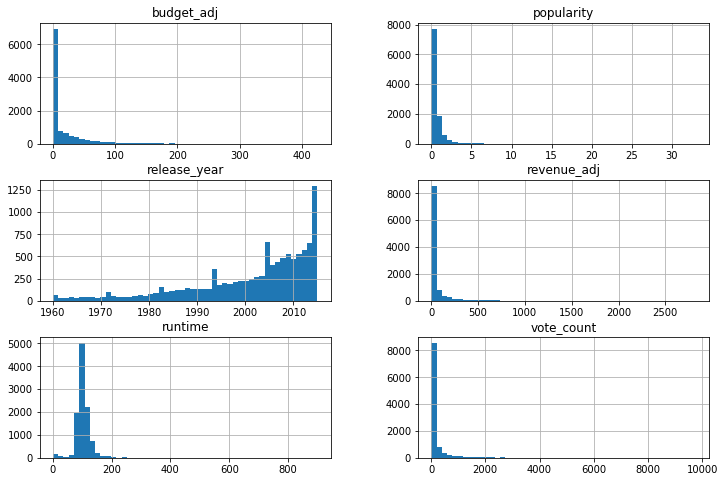

In [32]:
#Create a histogram for each feature
numeric_df.hist(figsize=(12,8), bins = 50);

As I can see, in this case there is a lot of 0 in this data or at least low values. Using this data it will be dificult to see if there is a correlation between this features. So before looking for correlations, let's clean more this data.

The first thing I will look is to check the number of films that they have 0 as a revenue.

In [33]:
#Number of rows with the value of revenue 0
numeric_df.query('revenue_adj == 0.0').shape[0]

6397

As excepected, the number of rows in where the revenue is 0 is really big! So almost half of the films they don't have revenue, this in reality is really unlikely. So probably is missing this data and it was just imputed with a 0.

Then I will remove this lines before checking the features that they are more correlated with the revenue. And also I will remove the lines with budget 0 because it also doesn't make sense to make a film without budget.

In [34]:
#Drop the lines with revenue 0
numeric_df.drop(numeric_df.query('revenue_adj == 0.0').index, axis = 0, inplace = True)

#Drop the lines with budget 0
numeric_df.drop(numeric_df.query('budget_adj == 0.0').index, axis = 0, inplace = True)

#Show size
numeric_df.shape

(3546, 6)

At the end I only have 3546 rows. Now let's plot again the histogram.

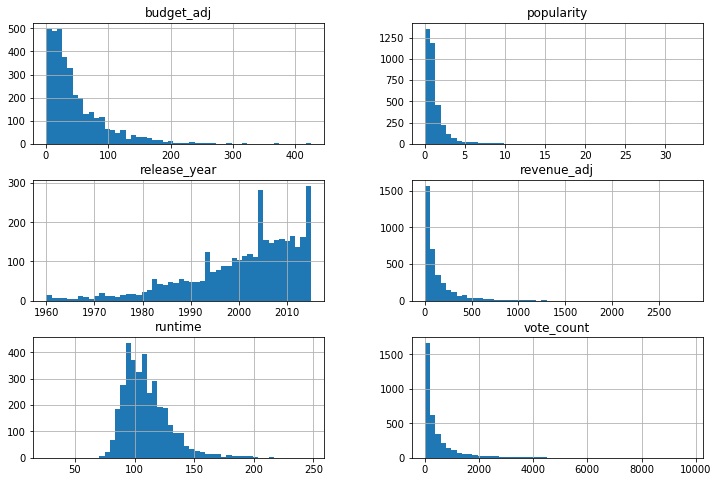

In [35]:
#Create a histogram for each feature
numeric_df.hist(figsize=(12,8), bins = 50);

Now I will do a scatter plot for each of them.

To do that I will use the library seaborn in where I will be available to create a scatter plot for all the different features and also a bar plot. To do that I found the documentation in this [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

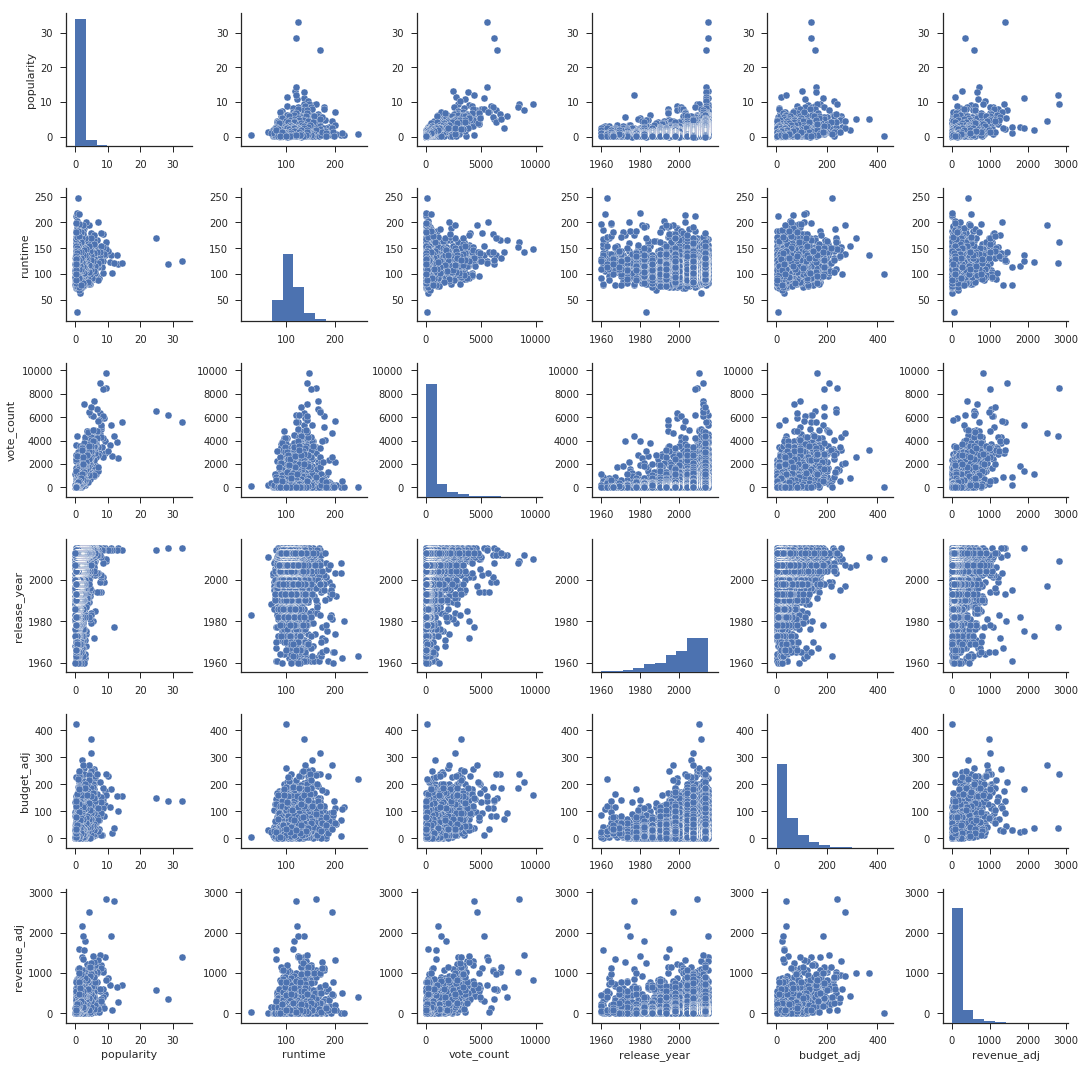

In [36]:
sns.set(style="ticks", color_codes=True);
sns.pairplot(numeric_df);

As I can see from the previous plot, the feature `revenue_adj` doesn't have any column with a right strong correlation. Maybe the one is more correlated could be with the `vote_count`.

To see better this scatterplot I will plot it individually using the library matplotlib.

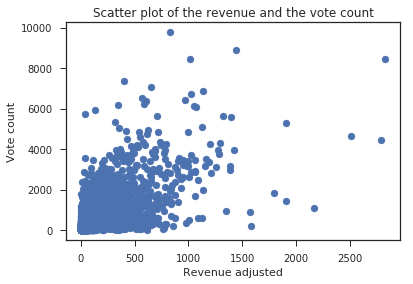

In [37]:
#Create a scatter plot
plt.scatter(x = numeric_df.revenue_adj, y = numeric_df.vote_count);
plt.xlabel("Revenue adjusted");
plt.ylabel("Vote count");
plt.title("Scatter plot of the revenue and the vote count");
plt.show();

Another whey to see if there are correlations is using a correlation matrix. To do that I will use the function `corr()`. To do this I found the code in this [link](https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas).

In [38]:
#Correlation matrix of the dataframe 'numeric_df'
numeric_df.corr().style.background_gradient(cmap='coolwarm')

,popularity,runtime,vote_count,release_year,budget_adj,revenue_adj
popularity,1,0.209782,0.7757,0.19633,0.380118,0.536223
runtime,0.209782,1,0.273226,-0.112105,0.32603,0.277108
vote_count,0.7757,0.273226,1,0.23173,0.483383,0.646261
release_year,0.19633,-0.112105,0.23173,1,0.108743,-0.0862993
budget_adj,0.380118,0.32603,0.483383,0.108743,1,0.554509
revenue_adj,0.536223,0.277108,0.646261,-0.0862993,0.554509,1


<a id='conclusions'></a>
## Conclusions

As a conclusion of the first question I can say that the genre most popular during the last years is the `Drama` followed by the `Comedy`. But the winner is clear with a big difference compared to the other gendres.

For the second question, as I said before this question can be really general and big to answer because the revenue can depend in a lot of things and even I could use more external data to unser this questions but just to not make really big this project I choose only to use the numeric variables. With this variables I coudln't see a big correlations with the revenue. The highest one was 0.64 with the `vote_count` column follower by the `budget_adj` with 0.55. This doesn't mean that this are really key to determine the revenue of the film but it make sense because a film with a high budget and a lot of votes is high probability that it will have a big revenue.


## Submitting your Project 

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0